<a href="https://colab.research.google.com/github/srv96/AI-ML-TensorFlow/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget 'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv'


--2025-01-19 19:16:24--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2025-01-19 19:16:24 (24.5 MB/s) - ‘moore.csv’ saved [2302/2302]



In [3]:
data = pd.read_csv('moore.csv',header=None).to_numpy()

In [4]:
X = data[:,0].reshape(-1,1)
y = data[:,1]

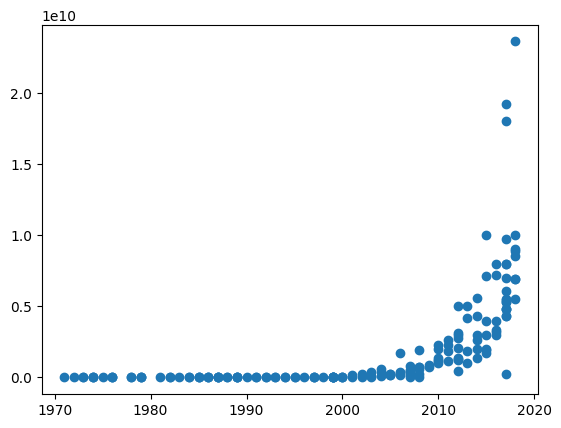

In [5]:
plt.scatter(X,y)

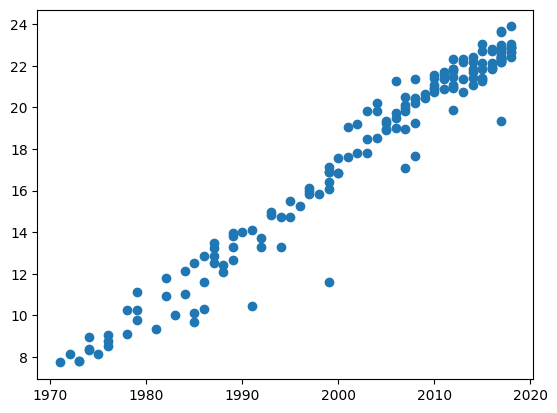

In [6]:
y = np.log(y)
plt.scatter(X,y)

In [7]:
X = X - X.mean()

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001,0.9),
    loss='mse'
    )

In [10]:
def schedule(epoch,lr):
  if epoch >= 50:
    return 0.0001
  else:
    return lr
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [11]:
r = model.fit(X, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 396.2373 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 331.5706 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 282.5407 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 202.8221 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 183.9003 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 125.1843 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 102.2135 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 62.6734 - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47.6229 - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39.1716 - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29.8680 - learning_rate: 0.0010
Epoch 12/200

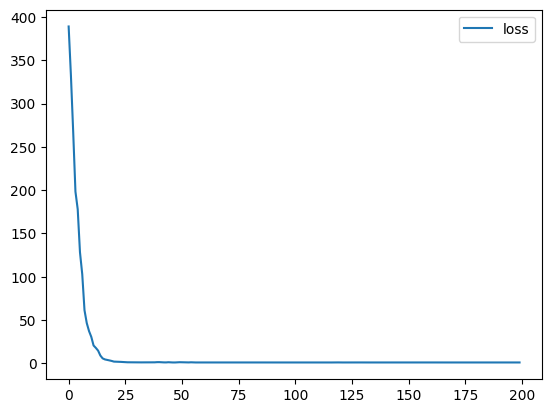

In [12]:
plt.plot(r.history['loss'],label='loss')
plt.legend()

In [13]:
model.layers[0].get_weights()

[array([[0.32963768]], dtype=float32), array([17.771425], dtype=float32)]

In [14]:
a = model.layers[0].get_weights()[0][0,0]

In [15]:
a

0.32963768

In [16]:
np.log(2) / a

2.102754721386952

In [17]:
X = X.flatten()
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(y) - y.mean() * X.sum()) / denominator
b = (y.mean() * X.dot(X) - X.mean() * X.dot(y)) / denominator

print(a , b)

0.341682487387313 17.764939393631764


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


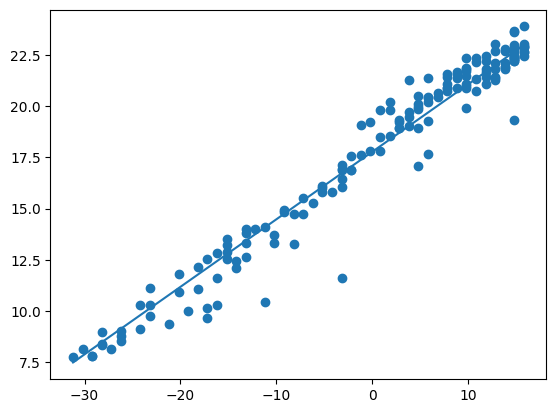

In [18]:
y_hat = model.predict(X).flatten()
plt.scatter(X,y)
plt.plot(X,y_hat)

In [20]:
W , b = model.layers[0].get_weights()
X = X.reshape(-1,1)
y_hat2 = (X.dot(W) + b).flatten()
np.allclose(y_hat, y_hat2)

True